In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("datos_recta.dat")
x_obs = data[:,0]
y_obs = data[:,1]
sigma_obs = data[:,2]

<ErrorbarContainer object of 3 artists>

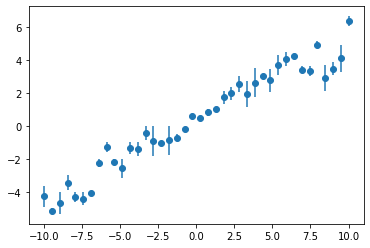

In [3]:
plt.errorbar(data[:,0], data[:,1], data[:,2], fmt='o')

P(parametros|obs) aprox P(obs|parametros)

P(m,b | obs) aprox P(obs | m,b)

In [4]:
def modelo(x_obs, m, b):
    return (x_obs * m) + b

In [18]:
def loglikelihood(x_obs, y_obs, sigma_obs, m, b):
    y_modelo = modelo(x_obs, m, b)
    x = -0.5*np.sum(((y_modelo - y_obs)/sigma_obs)**2)
    return x

In [23]:
n_iteraciones = 10000
m_walk = np.zeros(n_iteraciones)
b_walk = np.zeros(n_iteraciones)

for i in range(1,n_iteraciones):
    m_prime = np.random.normal(m_walk[i-1],0.1)
    b_prime = np.random.normal(b_walk[i-1],0.1)
    
    l_now = loglikelihood(x_obs, y_obs, sigma_obs, m_walk[i-1], b_walk[i-1])
    l_next = loglikelihood(x_obs, y_obs, sigma_obs, m_prime, b_prime)
    #print(l_now, l_next)
    gamma = np.min([1.0, np.exp(l_next-l_now)])
    #print(gamma)
    
    alpha = np.random.random()
    if alpha<gamma:
        m_walk[i] = m_prime
        b_walk[i] = b_prime
    else:
        m_walk[i] = m_walk[i-1]
        b_walk[i] = b_walk[i-1]

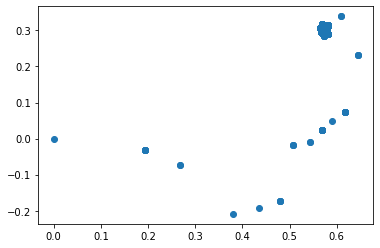

In [24]:
plt.scatter(m_walk, b_walk)

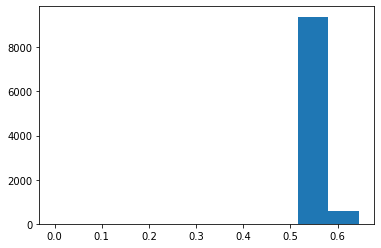

In [25]:
_ = plt.hist(m_walk)

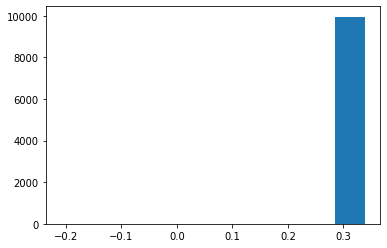

In [26]:
_ = plt.hist(b_walk)

In [27]:
m_best = np.mean(m_walk)
m_error = np.std(m_walk)
print(m_best, m_error)

0.5753057830165497 0.012829541843533921


In [28]:
b_best = np.mean(b_walk)
b_error = np.std(b_walk)
print(b_best, b_error)

0.30276533913340636 0.020882083290704918


In [29]:
x_teorico = np.linspace(x_obs.min(), x_obs.max(),100)
y_teorico = modelo(x_teorico, m_best, b_best)

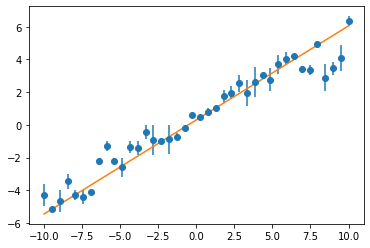

In [30]:
plt.errorbar(data[:,0], data[:,1], data[:,2], fmt='o')
plt.plot(x_teorico, y_teorico)